In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()

In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

In [7]:
n=9487

In [8]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
y_train[n]

1

In [10]:
m = 8888

correct ans : 3


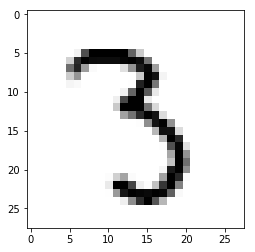

In [11]:
plt.imshow(x_train[m], cmap = "Greys")
print("correct ans :", y_train[m])

### 3. Data sorting

In [12]:
np.array([3, 78, 95, 99])/100

array([0.03, 0.78, 0.95, 0.99])

In [13]:
x_train = x_train/255

In [14]:
x_test = x_test/255

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
x_train = x_train.reshape(60000, 784)

In [17]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
x_test = x_test.reshape(10000, 784)

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
y_train[9487]

1

In [21]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [22]:
y_train[n]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Build a Neural Network

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [24]:
model = Sequential()

In [25]:
model.add(Dense(87, input_dim = 784, activation = 'relu'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [26]:
model.add(Dense(87, activation = 'relu'))

In [27]:
model.add(Dense(10, activation = 'softmax'))

### compile the NN

In [28]:
model.compile(loss = 'mse', optimizer = SGD(lr = 0.087), metrics = ['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 87)                68295     
_________________________________________________________________
dense_1 (Dense)              (None, 87)                7656      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                880       
Total params: 76,831
Trainable params: 76,831
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20


In [ ]:
result = model.predict_classes(x_test)

In [ ]:
def show_predict(n):
    print("ans :", result[n])
    plt.imshow(result[n], cmap = 'Greys')